In [1]:
import pandas as pd
from plotnine import *

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### I'm interested in evaluations (FCE) -- how much is the number of evaluations a source has related to poverty or race?

In [13]:
df = pd.read_csv("documents-by-source-demographics.csv")

In [14]:
df.head()

,id,name_x,zip_code,county,full_address,geometry,fce,sar,violations,total,...,black_pct,am_indian_ak_native_pct,asian_pct,hi_pc_islander_pct,other_pct,srn,approved,years,years_converted,fce_per_year
0,A6260,ALGONAC CAST PRODUCTS INC,48001.0,SAINT CLAIR,"9300 STONE ROAD, ALGONAC, MI","[-82.54572189999999, 42.6299997]",0.0,1.0,0.0,11818.0,...,0.1,0.6,0.6,0.1,1.6,A6260,2014-01-23,8.186342,8.186342,0.0
1,N6769,SUNSATION PRODUCTS INC,48001.0,SAINT CLAIR,"9635 KRETZ DR, ALGONAC, MI","[-82.5700738, 42.6222489]",0.0,2.0,0.0,11818.0,...,0.1,0.6,0.6,0.1,1.6,N6769,2014-09-18,7.534720,7.534720,0.0
2,P1024,ALTA EQUIPMENT COMPANY,48001.0,KENT,"8840 BYRON COMMERCE DRIVE, BYRON CENTER, MI","[-85.6703763, 42.80414830000001]",0.0,0.0,0.0,11818.0,...,0.1,0.6,0.6,0.1,1.6,P1024,2019-05-13,2.885754,2.885754,0.0
3,P1089,CARL SCHEGEL,48001.0,JACKSON,"4500 MANN ROAD, CONCORD, MI","[-84.68608139999999, 42.1971472]",0.0,0.0,0.0,11818.0,...,0.1,0.6,0.6,0.1,1.6,P1089,2019-10-29,2.423048,2.423048,0.0
4,P1015,"ENBRIDGE ENERGY, LP",48001.0,IRON,"SEC 35, T43N, R32W, CRYSTAL FALLS, MI","[-88.3340242, 46.0980066]",0.0,0.0,0.0,11818.0,...,0.1,0.6,0.6,0.1,1.6,P1015,2021-05-25,0.851489,0.851489,0.0


<AxesSubplot:>

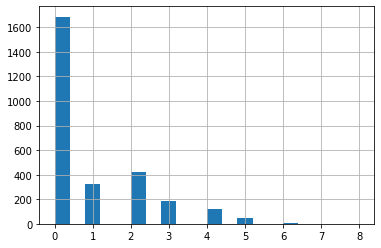

In [15]:
df.fce.hist(bins=20)

<AxesSubplot:>

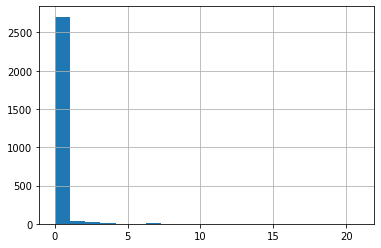

In [49]:
df.fce_per_year.hist(bins=20)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 29 rows containing missing values.


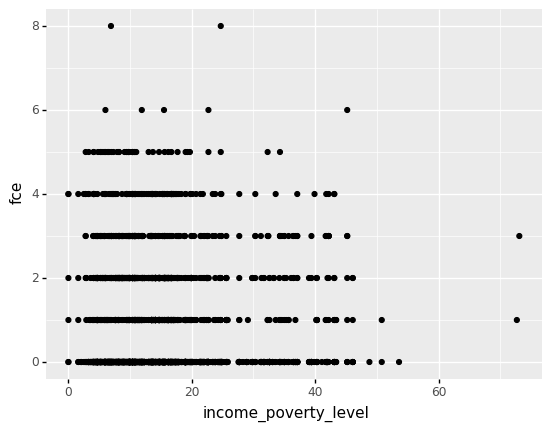

<ggplot: (337773617)>

In [16]:
(
    ggplot(df,
          aes(x='income_poverty_level',y='fce'))
        + geom_point()
)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 29 rows containing missing values.


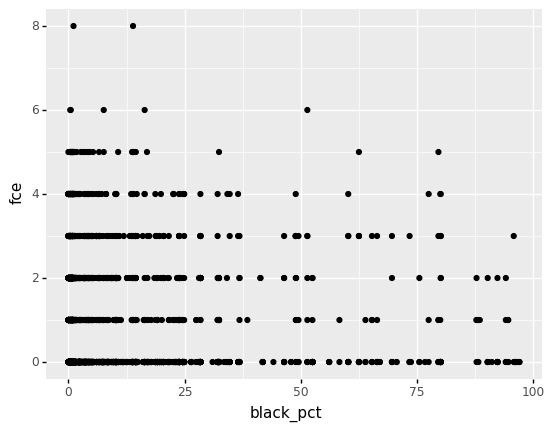

<ggplot: (337839526)>

In [17]:
(
    ggplot(df,
          aes(x='black_pct',y='fce'))
        + geom_point()
)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 29 rows containing missing values.


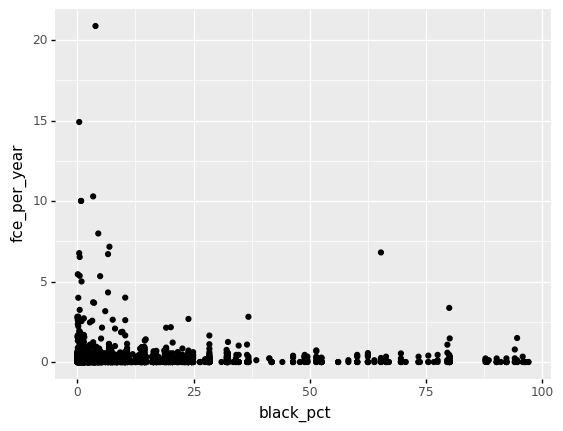

<ggplot: (337862425)>

In [18]:
(
    ggplot(df,
          aes(x='black_pct',y='fce_per_year'))
        + geom_point()
)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 29 rows containing missing values.


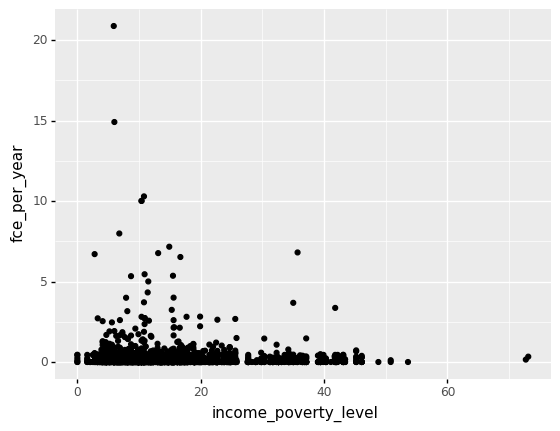

<ggplot: (337915989)>

In [19]:
(
    ggplot(df,
          aes(x='income_poverty_level',y='fce_per_year'))
        + geom_point()
)

In [41]:
df.corr().round(2)

,zip_code,fce,sar,violations,total,income_poverty_level,white_pct,black_pct,am_indian_ak_native_pct,asian_pct,hi_pc_islander_pct,other_pct,years,years_converted,fce_per_year
zip_code,1.00,0.07,0.03,-0.06,-0.26,-0.10,0.33,-0.31,0.27,-0.27,-0.00,-0.01,0.05,0.01,0.05
fce,0.07,1.00,0.60,0.25,-0.03,-0.01,0.02,-0.03,-0.02,-0.00,-0.01,0.01,0.17,0.07,0.38
sar,0.03,0.60,1.00,0.35,-0.02,0.01,0.01,-0.02,0.02,0.01,0.02,0.02,0.16,0.06,0.20
violations,-0.06,0.25,0.35,1.00,-0.02,0.10,-0.07,0.06,-0.01,0.00,0.03,0.08,0.04,-0.00,0.06
total,-0.26,-0.03,-0.02,-0.02,1.00,0.07,-0.29,0.21,-0.13,0.25,-0.00,0.27,-0.04,-0.02,0.01
income_poverty_level,-0.10,-0.01,0.01,0.10,0.07,1.00,-0.62,0.60,0.10,-0.07,0.04,0.40,0.04,0.06,-0.03
white_pct,0.33,0.02,0.01,-0.07,-0.29,-0.62,1.00,-0.95,-0.03,-0.28,-0.07,-0.36,0.00,-0.04,0.02
black_pct,-0.31,-0.03,-0.02,0.06,0.21,0.60,-0.95,1.00,-0.05,0.05,0.03,0.17,0.01,0.04,-0.02
am_indian_ak_native_pct,0.27,-0.02,0.02,-0.01,-0.13,0.10,-0.03,-0.05,1.00,-0.07,0.06,0.09,0.01,0.01,-0.01
asian_pct,-0.27,-0.00,0.01,0.00,0.25,-0.07,-0.28,0.05,-0.07,1.00,0.09,0.03,-0.02,0.02,0.00


In [34]:
df_zip = pd.read_csv("document-by-zip.csv")

In [40]:
df_zip.corr().round(2)

,zip_code,sources,fce,sar,violations,total,income_poverty_level,white_pct,black_pct,am_indian_ak_native_pct,asian_pct,hi_pc_islander_pct,other_pct
zip_code,1.00,-0.02,0.13,0.00,-0.08,-0.37,-0.09,0.34,-0.33,0.30,-0.28,-0.03,-0.03
sources,-0.02,1.00,0.82,0.84,0.38,0.44,0.08,-0.14,0.09,-0.07,0.13,-0.02,0.19
fce,0.13,0.82,1.00,0.85,0.32,0.21,0.01,-0.02,0.00,-0.07,0.04,-0.05,0.13
sar,0.00,0.84,0.85,1.00,0.46,0.33,0.06,-0.10,0.06,-0.05,0.10,-0.01,0.17
violations,-0.08,0.38,0.32,0.46,1.00,0.09,0.21,-0.18,0.15,-0.08,0.06,0.03,0.21
total,-0.37,0.44,0.21,0.33,0.09,1.00,0.10,-0.42,0.35,-0.15,0.34,-0.03,0.26
income_poverty_level,-0.09,0.08,0.01,0.06,0.21,0.10,1.00,-0.58,0.57,0.08,-0.01,0.06,0.34
white_pct,0.34,-0.14,-0.02,-0.10,-0.18,-0.42,-0.58,1.00,-0.96,-0.07,-0.27,-0.03,-0.37
black_pct,-0.33,0.09,0.00,0.06,0.15,0.35,0.57,-0.96,1.00,-0.04,0.05,0.01,0.20
am_indian_ak_native_pct,0.30,-0.07,-0.07,-0.05,-0.08,-0.15,0.08,-0.07,-0.04,1.00,-0.06,0.03,0.09


/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 17 rows containing missing values.


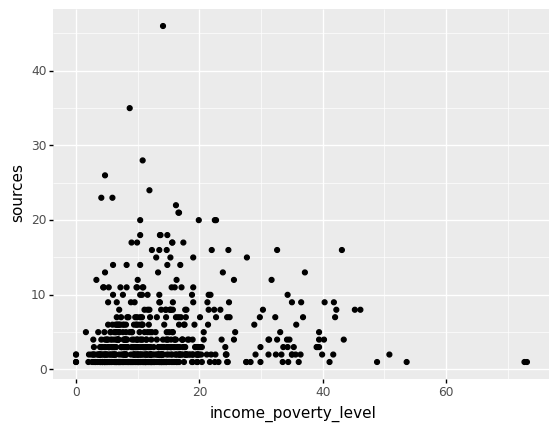

<ggplot: (339074594)>

In [43]:
(
    ggplot(df_zip,
          aes(x='income_poverty_level',y='sources'))
        + geom_point()
)

# Regressions

In [31]:
### ODD That a negative relationship shows up -- the longer the permit, the lower the rate of fce_per_year
import statsmodels.formula.api as smf
model = smf.ols("fce_per_year ~ years_converted", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           fce_per_year   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           7.86e-53
Time:                        23:43:39   Log-Likelihood:                -3239.0
No. Observations:                2789   AIC:                             6482.
Df Residuals:                    2787   BIC:                             6494.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8010      0.040     19.860      0.000       0.722       0.880
years_converted    -0.0823      0.005    -15.626      0.000      -0.093      -0.072
==============================================================================
Omnibus:                     5019.499   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7075860.260
Skew:                          12.790   Prob(JB):                         0.00
Kurtosis:                     248.428   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
model = smf.ols("fce ~ sources", data=df_zip)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fce   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     849.1
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          3.00e-101
Time:                        00:04:08   Log-Likelihood:                -1123.4
No. Observations:                 405   AIC:                             2251.
Df Residuals:                     403   BIC:                             2259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2433      0.279      0.871      0.384      -0.306       0.792
sources        1.0121      0.035     29.140      0.000       0.944       1.080
==============================================================================
Omnibus:                       89.746   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              825.507
Skew:                           0.633   Prob(JB):                    5.54e-180
Kurtosis:                       9.879   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model = smf.ols("sources ~ black_pct", data=df_zip)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sources   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.358
Date:                Sat, 02 Apr 2022   Prob (F-statistic):             0.0210
Time:                        00:04:42   Log-Likelihood:                -1826.3
No. Observations:                 606   AIC:                             3657.
Df Residuals:                     604   BIC:                             3665.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3383      0.222     19.562      0.000       3.903       4.774
black_pct      0.0250      0.011      2.315      0.021       0.004       0.046
==============================================================================
Omnibus:                      413.276   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5160.524
Skew:                           2.920   Prob(JB):                         0.00
Kurtosis:                      16.049   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
df.sort_values("fce_per_year",ascending=False).head(20)

,id,name_x,zip_code,county,full_address,geometry,fce,sar,violations,total,...,black_pct,am_indian_ak_native_pct,asian_pct,hi_pc_islander_pct,other_pct,srn,approved,years,years_converted,fce_per_year
371,M4780,ROUSH INDUSTRIES,48150.0,WAYNE,"36630 COMMERCE, LIVONIA, MI","[-83.40355790000001, 42.3725279]",4.0,5.0,0.0,25666.0,...,3.9,0.1,2.3,0.0,2.6,M4780,2022-01-21,0.191653,0.191653,20.871000
1897,B1976,J.B. SIMS GENERATING STATION,49417.0,OTTAWA,"1231 N. THIRD ST., GRAND HAVEN, MI","[-86.23431389999999, 43.0703422]",6.0,6.0,1.0,31037.0,...,0.4,0.3,0.9,0.0,2.7,B1976,2021-11-05,0.402472,0.402472,14.907857
2741,A2402,"ACCESS BUSINESS GROUP, LLC",49355.0,KENT,"7575 E FULTON RD, ADA, MI","[-85.4882275, 42.9579966]",4.0,5.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,A2402,2021-11-16,0.372355,0.372355,10.742426
1947,B6356,THE WORDEN GROUP,49423.0,OTTAWA,"199 E. 17TH ST., HOLLAND, MI","[-86.0977906, 42.7818765]",2.0,2.0,0.0,41484.0,...,3.4,0.5,2.5,0.0,9.0,B6356,2022-01-20,0.194391,0.194391,10.288521
2587,P0796,UPPER MICHIGAN ENERGY RESOURCES -A.J. MIHM G.S.,49849.0,BARAGA,"16017 SARYA ROAD, PELKIE, MI","[-88.6166085, 46.7936854]",2.0,2.0,0.0,12118.0,...,0.8,0.4,0.8,0.0,3.0,P0796,2022-01-18,0.199867,0.199867,10.006644
2586,P0797,UPPER MICHIGAN ENERGY RESOURCES -F.D. KUESTER ...,49849.0,MARQUETTE,"80 EAGLE MILLS ROAD, NEGAUNEE, MI","[-87.5107056, 46.5130831]",2.0,2.0,0.0,12118.0,...,0.8,0.4,0.8,0.0,3.0,P0797,2022-01-18,0.199867,0.199867,10.006644
719,B2329,PAR STERILE PRODUCTS LLC,48307.0,OAKLAND,"870 PARKDALE RD, ROCHESTER, MI","[-83.11913170000001, 42.6872164]",4.0,5.0,0.0,43201.0,...,4.5,0.2,11.9,0.0,3.0,B2329,2021-09-30,0.501037,0.501037,7.983443
1607,B6519,W. R. GRACE & CO.-CONN.,49090.0,VAN BUREN,"1421 KALAMAZOO ST, SOUTH HAVEN, MI","[-86.27303189999999, 42.3848496]",2.0,2.0,0.0,14127.0,...,6.9,0.2,1.8,0.0,7.5,B6519,2021-12-20,0.279267,0.279267,7.161618
833,B1950,CLINTON RIVER WRRF,48342.0,OAKLAND,"155 N OPDYKE ROAD, PONTIAC, MI","[-83.25454400000001, 42.6389509]",3.0,3.0,1.0,16645.0,...,65.3,0.2,0.9,0.0,7.2,B1950,2021-10-22,0.440803,0.440803,6.805761
2603,B1855,"DUNN PAPER, INC.",49858.0,MENOMINEE,"144 FIRST STREET, MENOMINEE, MI","[-87.59789169999999, 45.0985895]",3.0,3.0,3.0,11516.0,...,0.4,0.3,0.4,0.0,2.9,B1855,2021-10-21,0.443541,0.443541,6.763750
